In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *

import gc
torch.cuda.empty_cache()
gc.collect()

%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 5
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

In [3]:
# from MetaLearner import HDDOnBands

weights, dist_batches = HDDOnBands.createMinSimilarityBasedBatches(X,3)

# print(weights)
# print("########################")
# print(dist_batches)

XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  87.07434105873108
XXXXXXX IN CLASSIFICATION XXXXXXXXX
Train Accuracy:  0.7281622067664741
Test Accuracy:  0.5054151624548736


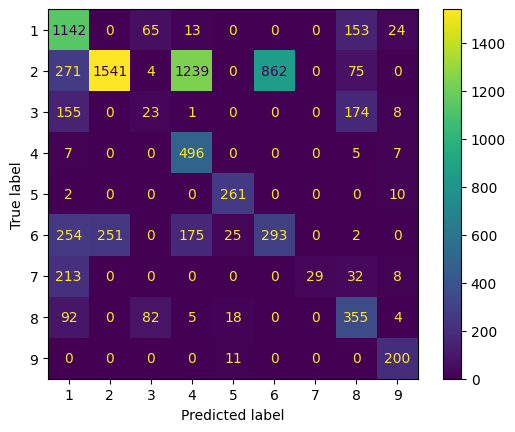

In [4]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common')

confusion_mat(test_gt,test_preds, range(1,10))


In [5]:
import gc
torch.cuda.empty_cache()
gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

confusion_mat(test_gt,test_preds, range(1,10))


NameError: name 'weights' is not defined